# Interacting with PyLie's database

As explained in Appendix D of PyR@TE 3's manual, it might be necessary to use Clebsch-Gordan coefficients (CGCs) to build the Lagrangian of a given model. The general syntax in the model file is:

Here, `P` indicates that we are using the `P`th invariant tensor returned by PyLie's `invariants()` function. When there is only one possible gauge invariant contraction, this last argument can simply be omitted. In other cases however, there might be several such invariants. In this case, we have to interrogate PyLie's database to get the return value of the `invariants()` function.
In this tutorial notebook, we show how to interact with the database to get various types of information, such as the CGCs, and some other info related to the Lie algebras.

---
First, let's get into PyLie's main directory (located in `/src/PyLie` from PyR@TE's directory) :

In [ ]:
%cd .../PyR@TE_3/src/PyLie

Let's import the PyLieDB class and load the database (DB) by instantiating a database object, `db` :

In [2]:
from PyLieDB import PyLieDB

# Create an instance of the Database object
db = PyLieDB()

The content of the DB can be printed at any time calling `db.visit()`, or, equivalently, `print(db)`. The argument `shorter=True` can be provided if we do not want to display the whole content of the contained matrices and tensors.

In [3]:
db.visit(shorter=True)

Content of the DB (unzipped size = 2.54MB):

E6
   /adjointrep : [0 0 0 0 0 1]
   /cartanmatrix
      /k : [[0 0]
            [0 1]
            [1 0]
            ...
            [4 4]
            [5 2]
            [5 5]]
      /s : [6 6]
      /v : [b'2' b'-1' b'-1' ... b'2' b'-1' b'2']
   /dimension : 78
   /fullname : E6
   /name : E6
   /rank : 6
   /structureconstants
      /k : [[ 0  1  6]
            [ 0  6  1]
            [ 0  7 11]
            ...
            [77 61 25]
            [77 70 34]
            [77 71 35]]
      /s : [78 78 78]
      /v : [b'-1/2' b'1/2' b'1/2' ... b'1/2' b'-1/2' b'-1/2']

E7
   /adjointrep : [1 0 0 0 0 0 0]
   /cartanmatrix
      /k : [[0 0]
            [0 1]
            [1 0]
            ...
            [5 5]
            [6 2]
            [6 6]]
      /s : [7 7]
      /v : [b'2' b'-1' b'-1' ... b'2' b'-1' b'2']
   /dimension : 133
   /fullname : E7
   /name : E7
   /rank : 7
   /structureconstants
      /k : [[  0   1   7]
            [  0   7   1]


### [Optional] Load the database

At this point, we may load the database using `db.load()`. If we skip this step, any request sent to the database will trigger the following operations :
1. Uncompress the DB
2. Load the DB
3. Send the request / print the result
4. Update the content of the DB
4. Close the DB
5. Compress the DB (using gzip)

If the `PyLieDB` file is large, the above steps (in particular steps 1 and 6) will take quite some time. In such cases, the user should load the database once, and close it afterwards using `db.close()`. While the database is loaded, a lock will prevent any other program to access it. Therefore it is very important to close it in order to release this lock and allow PyR@TE 3 to access its content at a later time.

In [4]:
# Optional : load the database (uncomment if needed)

# db.load()

---

In [5]:
# Load sympy's printing system in order to get good-looking output in the following
from sympy import init_session

init_session(quiet=True)

---
## Getting information from the DB 

### Some basic information

Before discussing the CGCs, let us try and get some information about the gauge groups. Here and after, the standard way to ask the DB some information is to use the method `db.get(Group, Type of info, [Arguments, [Keyword arguments]])`. If the information is not already present in the DB, it will be automatically computed and stored.

In [6]:
print('SU2 dimension : ', db.get('SU2', 'dimension'))
print('SO10 dimension: ', db.get('SO10', 'dimension'))
print('SU3 rank : ', db.get('SU3', 'rank'))
print('SU5 adjoint representation :', db.get('SU5', 'adjoint'))
print('E8 dimension and rank : ', db.get('E8', 'dimension'), ' ; ', db.get('E8', 'rank'))
print('G2 cartan matrix :', db.get('G2', 'cartan'))

print('\n\nSU2 structure constants:')
print(db.get('SU2', 'structureConstants'))

SU2 dimension :  3
SO10 dimension:  45
SU3 rank :  2
SU5 adjoint representation : [1, 0, 0, 1]
E8 dimension and rank :  248  ;  8
G2 cartan matrix : Matrix([[2, -3], [-1, 2]])


SU2 structure constants:
[Matrix([
[0,  0, 0],
[0,  0, 1],
[0, -1, 0]]), Matrix([
[0, 0, -1],
[0, 0,  0],
[1, 0,  0]]), Matrix([
[ 0, 1, 0],
[-1, 0, 0],
[ 0, 0, 0]])]


Here is a sumary of the commands used to get basic information about the Lie algebras :

| Command | Description  |
| ------- |-----------|
| `'name'` | Name of the algebra (according to Cartan classification) |
| `'rank'` | Rank of the algebra |
| `'dimension'`, `'dim'` | Dimension of the algebra (i.e. of its adjoint representation) |
| `'cartanMatrix'`, `'cartan'` | Cartan matrix of the algebra |
| `'adjointRep'`, `'adjoint'` | Dynkin labels of the adjoint representation |
| `'structureConstants'`, `'struct'` | Structure constants of the algebra |

---
### Representations and Dynkin labels

In PyLie, the irredicible representations of the gauge groups are uniquely defined by their Dynkin labels. Various functions are implemented in PyLieDB that can help identify the Dynkin labels of a given representation.

##### 1. Identification of a representation by its dimension

To identify the Dynkin labels of a representation based on its dimension, one can call `db.get([group], 'labels', [dimension])`. For instance:

In [7]:
# Adjoint representation of SU(2)
print( db.get('SU2', 'labels', 3) )

# Representation 10 of SU(5)
print( db.get('SU5', 'labels', 10) )

# Representation 126 and 126* of SO(10)
print( db.get('SO10', 'labels', 126) , " and ", db.get('SO10', 'labels', -126) )

[2]
[0, 1, 0, 0]
[0, 0, 0, 0, 2]  and  [0, 0, 0, 2, 0]


If several representations have the same dimension, the output will be a list of Dynkin labels:

In [8]:
# 15-dimensional representations of SU(3)
db.get('SU3', 'labels', 15)

##### 2. Display the first representations of a given algebra

To display the first few representation of a gauge group, one can call `db.get([group], 'firstReps', [N])` where `N` is a positive integer:

In [9]:
db.get('SU4', 'firstReps', 5)

-- First representations of SU4 --

[1, 0, 0] : 4
[0, 0, 1] : -4
[0, 1, 0] : 6
[0, 0, 2] : 10
[2, 0, 0] : -10
[1, 0, 1] : 15
[0, 1, 1] : 20
[1, 1, 0] : -20
[0, 2, 0] : 20'
[0, 0, 3] : 20''
[3, 0, 0] : -20''


The output is in the form `[Dynkin labels] : name`, where `name` refers to the usual Particle Physics notation based on the dimension of the representation. Here we see that $\mathit{SU}(4)$ contains three 20-dimensional representations, distinguished from one another adding one or more "primes" `'` to the dimension. We emphasize that a minus sign indicates a conjugate representation.

##### 3. The other way around : from Dynkin labels to dimension

One can get the dimension of a given representation from its Dynkin labels using `db.get([group], 'dimR', [representation])` :

In [10]:
db.get('F4', 'dimR', [1,0,0,0])

More conveniently, its Particle Physics notation can be retrieved calling `db.get([group], 'repName', [representation], latex = True/False, iLatex=True/False)`. The `latex` keyword produces a Latex string, the `iLatex` displays this latex output in an interactive session like this one :

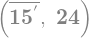

In [11]:
db.get('SU3', 'repName', [0,4], iLatex=True), db.get('SU5', 'repName', [1,0,0,1], iLatex=True)

The following table summarizes the various commands that can be called to get information about the representations :

| Command | Argument | Keyword Arguments | Description |
| ------- |-----------|-------------------| -----------|
| `'dynkinLabels'`, `'labels'` | Dimension of the representation | / | |
| `'firstReps'` | A positive integer | / | |
| `'dimR'` | Dynkin labels of a representation | / | |
| `'repName'` | Dynkin labels of a representation | `latex=True/False`, `iLatex=True/False` | |
| `'conjugate'` | Dynkin labels of a representation | / | Returns the conjugate representation |
| `'frobenius'` | Dynkin labels of a representation | / | Returns the Frobenius-Schur indicator |
| `'dynkinIndex'`, `'index'` | Dynkin labels of a representation | / | Returns the Dynkin index |


The Frobenius-Schur indicator is an integer whose value depends on the "reality" of the representation. It may take the three following values :
- $1$ if the representation is complex
- $0$ if the representation is real
- $-1$ if the representation is pseudo-real

We note that for pseudo-real representation, the conjugate representation can be accessed in the Dynkin-labels notation appending `True` to the list. For instance, the $\overline{\mathbf{2}}$ of $\mathit{SU}(2)$ is represented by `[1, True]`.

---
Now that we have introduced the Dynkin-labels notation, we may call three additional commands to get useful information from the database.

### Products of representations

The decomposition of products of representations in a direct sum may be obtained using the command `'repProduct'`, taking as argument a list of representations (in the Dynkin-labels notation). For instance:

In [12]:
db.get('SU3', 'repProduct', [[1,0], [0,1]], iLatex=True)

Here, we used the `'iLatex'` keyword argument to get a nice looking output. The information we get is that, in $\mathit{SU}(3)$,
$$
    \mathbf{3} \otimes \mathbf{3} = \mathbf{8}\oplus\mathbf{1}\,.
$$


Another more complicated example would be the product $\mathbf{16} \otimes \overline{\mathbf{126}} \otimes \mathbf{16}$ of $\mathit{SO}(10)$:

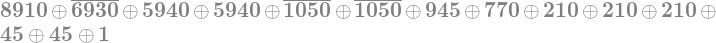

In [13]:
# Get the Dynkin labels of the 16 and 126* of SO10
r16 = db.get('SO10', 'labels', 16)
r126 = db.get('SO10', 'labels', -126)

db.get('SO10', 'repProduct', [r16, r126, r16], iLatex=True)

where the presence of the trivial representation indicates that we may construct a gauge singlet out of these three representations.

---
### Gauge generators

Another useful information is the expression of the generators of a given representation of a gauge group. We will refer to them as 'representation matrices'. The standard way to get representation matrices is to call `.get(Group, 'repMatrices', [representation])`. For instance, let us try to get the generators of the fundamental representations of $\mathit{SU}(2)$ and $\mathit{SU}(3)$:

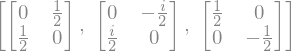

In [14]:
db.get('SU2', 'repMatrices', [1]) # We expect the Pauli matrices to show up ...

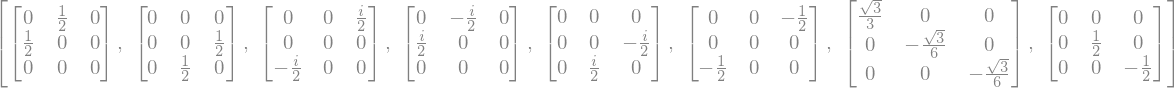

In [15]:
db.get('SU3', 'repMatrices', [1,0]) # We expect the Gell-Mann matrices to show up ...

The Pauli matrices did show up in the first case, but the second output does not exactly match the usual expression for the Gell-Mann matrices (altough it looks similar). This brings us to an important remark :

**The explicit form of the generators of a representation is not uniquely defined. For a given representation, there exists infinitely many sets of gauge generators satisfying the commutation relations of the Lie algebra. Some quantities, such as the CGCs, depend in general on the choice of generators.**

#### A subtelty : real representations

By default, generators of real representations are not imaginary and antisymmetric. For instance, the generators of the adjoint representation of $\mathit{SU}(2)$ are:

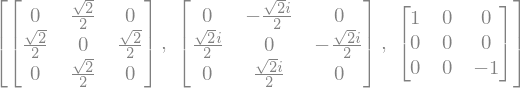

In [16]:
db.get('SU2', 'repMatrices', [2])

This can be an issue in some cases where the generators must be expressed in a real basis in order to guarantee gauge invariance at the level of the Lagrangian. An option, `realBasis`, was implemented in PyLie that can be used to rotate the generators to such a basis:

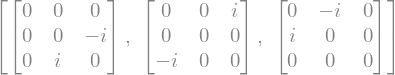

In [17]:
db.get('SU2', 'repMatrices', [2], realBasis = True)

For adjoint representations, the "rotated" generators thus obtained are also required to satisfy the relation
$$
    (T_a)^i_j = -i\,f_{a\ j}^{\ i}\,.
$$
In our case, we can check this easily:

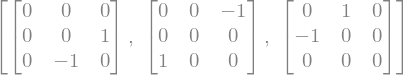

In [18]:
db.get('SU2', 'structureConstants')

---
### Clebsch-Gordan coefficients

We finally arrive to the computation of CGCs, which, as stated before, may be useful in some cases to construct the model file. The standard way of computing CGCs is to call `db.get([group], 'cgcs', [list of representations], [options])`.

To begin with a simple example, let us contract two fields transforming respectively in the $\mathbf{3}$ and $\overline{\mathbf{3}}$ of $\mathit{SU}(3)$ :

In [19]:
db.get('SU3', 'cgcs', [[1,0], [0,1]])

[a[1]*b[1] + a[2]*b[2] + a[3]*b[3]]

The output is a list containing the various invariants that can be formed out of the input representations. Here, the list contains a single element, meaning that there is only one way to contract the two fields. As expected, the two fields `a` and `b` may only be contracted as $a^i b_i$.

If we now consider the four representations $\mathbf{3}$, $\overline{\mathbf{3}}$, $\mathbf{3}$ and $\overline{\mathbf{3}}$, we get two possible invariant combinations:

In [20]:
db.get('SU3', 'cgcs', [[1,0], [0,1], [1,0], [0,1]])

[a[1]*b[1]*c[1]*d[1] + a[1]*b[1]*c[2]*d[2]/2 + a[1]*b[1]*c[3]*d[3]/2 + a[1]*b[2]*c[2]*d[1]/2 + a[1]*b[3]*c[3]*d[1]/2 + a[2]*b[1]*c[1]*d[2]/2 + a[2]*b[2]*c[1]*d[1]/2 + a[2]*b[2]*c[2]*d[2] + a[2]*b[2]*c[3]*d[3]/2 + a[2]*b[3]*c[3]*d[2]/2 + a[3]*b[1]*c[1]*d[3]/2 + a[3]*b[2]*c[2]*d[3]/2 + a[3]*b[3]*c[1]*d[1]/2 + a[3]*b[3]*c[2]*d[2]/2 + a[3]*b[3]*c[3]*d[3],
 a[1]*b[1]*c[2]*d[2] + a[1]*b[1]*c[3]*d[3] - a[1]*b[2]*c[2]*d[1] - a[1]*b[3]*c[3]*d[1] - a[2]*b[1]*c[1]*d[2] + a[2]*b[2]*c[1]*d[1] + a[2]*b[2]*c[3]*d[3] - a[2]*b[3]*c[3]*d[2] - a[3]*b[1]*c[1]*d[3] - a[3]*b[2]*c[2]*d[3] + a[3]*b[3]*c[1]*d[1] + a[3]*b[3]*c[2]*d[2]]

Suppose now that we want to use the above CGCs to compute the contractions $F\times G \times F \times G$ where $F$ and $G$ are two fields transforming respectively under $\mathbf{3}$ and $\overline{\mathbf{3}}$ of $\mathit{SU}(3)$. We would need to apply the following substitutions : 
$$
    a \rightarrow F \,,\\
    b \rightarrow G \,,\\
    c \rightarrow F \,,\\
    d \rightarrow G \,.
$$
To this purpose, the option `fields` may be used to indicate the name of the fields which must be substituted in place of `a`, `b`, `c` and `d`:

In [21]:
db.get('SU3', 'cgcs', [[1,0], [0,1], [1,0], [0,1]], fields=['F', 'G', 'F', 'G'])

After the substitution, we see that only one non-vanishing invariant is left. This is a consequence of the transformation properties of the various invariants under the permutation group. In this case, the second invariant was in fact antisymmetric under the permutations $a \leftrightarrow c$ and $b \leftrightarrow d$.

We end up this discussion with some additional examples :

In [22]:
# 2x2* of SU2
db.get('SU2', 'cgcs', [[1], [1, True]])

[a[1]*b[1] + a[2]*b[2]]

In [23]:
# 2x2 of SU2
db.get('SU2', 'cgcs', [[1], [1]])

[a[1]*b[2] - a[2]*b[1]]

In [24]:
# 3x3 of SU2  --  when the generators -are not- rotated to the real basis
db.get('SU2', 'cgcs', [[2], [2]])

[a[1]*b[3] - a[2]*b[2] + a[3]*b[1]]

In [25]:
# 3x3 of SU2  --  when the generators -are- rotated to the real basis
db.get('SU2', 'cgcs', [[2], [2]], realBasis=True)

[a[1]*b[1] + a[2]*b[2] + a[3]*b[3]]

In [26]:
# 10*5*10 of SU5
r10 = db.get('SU5', 'labels', 10)
r5 = db.get('SU5', 'labels', 5)

db.get('SU5', 'cgcs', [r10, r5, r10])

[a[10]*b[1]*c[5] - a[10]*b[2]*c[2] + a[10]*b[3]*c[1] + a[1]*b[3]*c[10] - a[1]*b[4]*c[9] + a[1]*b[5]*c[8] - a[2]*b[2]*c[10] + a[2]*b[4]*c[7] - a[2]*b[5]*c[6] + a[3]*b[2]*c[9] - a[3]*b[3]*c[7] + a[3]*b[5]*c[5] - a[4]*b[2]*c[8] + a[4]*b[3]*c[6] - a[4]*b[4]*c[5] + a[5]*b[1]*c[10] - a[5]*b[4]*c[4] + a[5]*b[5]*c[3] - a[6]*b[1]*c[9] + a[6]*b[3]*c[4] - a[6]*b[5]*c[2] + a[7]*b[1]*c[8] - a[7]*b[3]*c[3] + a[7]*b[4]*c[2] + a[8]*b[1]*c[7] - a[8]*b[2]*c[4] + a[8]*b[5]*c[1] - a[9]*b[1]*c[6] + a[9]*b[2]*c[3] - a[9]*b[4]*c[1]]

In [27]:
# If the database was loaded earlier using db.load(), we must close it now.

# db.close()